In [2]:
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 24 2024 10:11:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [6]:
IAF_TYPE = "iaf_psc_alpha"

class PhaseModule:

    phaseCounter = 0
    linkDuration = 35.0 #Duration every connection between 2 neurons

    def __init__(self,durationApprox=180.0):

        self.durationApprox = durationApprox
        self.neurons = []
        PhaseModule.phaseCounter+=1
        
    def createModuleNeurons(self):

        self.interNr = self.durationApprox // PhaseModule.linkDuration-1 #what's this?
        self.hNeuron = nest.Create(IAF_TYPE) #represents activity
        self.interNeurons = nest.Create(IAF_TYPE, int(self.interNr))
        self.tNeuron =  nest.Create(IAF_TYPE) #Transition to move from phase to phase
        self.qNeuron = nest.Create(IAF_TYPE)

        self.neurons.append(self.hNeuron[0]) #might be id into list
        self.neurons.extend(list(self.interNeurons))
        self.neurons.append(self.tNeuron[0])
        self.neurons.append(self.qNeuron[0])
    def connectModuleNeurons(self):
        
        nest.Connect(self.neurons[:len(self.neurons)-2], self.neurons[:len(self.neurons)-2],"one_to_one", {"weight":1100.0}) #Connection between all the inner network one to one
        
        

In [4]:
class NPG:

    def __init__(self, modulesNr=2,phasesDuration=[200,300],starting_node=0):

        self.modulesNR = modulesNr #How many phase generators we will need
        self.start = starting_node #id of the module
        self.phasesDuration = phasesDuration
        self.neurons = []
        self.modules = []


    def create(self, names=None):
        
        for mod in range(self.modulesNr):

            module = PhaseModule(self.phasesDuration[mod])

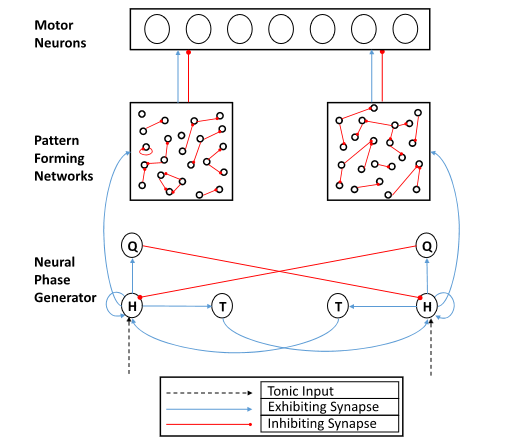